## IMPORTING LIBRARIES:

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## DATASET LOADING

In [64]:
df_shopsy = pd.read_csv("shopsy_all_products.csv")

In [65]:
df_shopsy

,Product Name,Category,Price,Rating,No_of_Reviews
0,Realglimpse Printed Women Pink T-Shirt,Women's Clothing,₹145,3.5,694
1,Full Sleeve Women Sweatshirt,Women's Clothing,₹192,3.8,562
2,Nakoda Creation Cotton Blend Women Dupatta,Women's Clothing,₹38,3.6,491
3,Monteiro Solid Women Multicolor Track Pants,Women's Clothing,₹122,3.7,136
4,"MOLASUS Women Hipster Blue, Yellow Panty",Women's Clothing,₹240,3.8,290
...,...,...,...,...,...
973,"spincart Large Gaming Mouse pad, Long XXL Big ...",Computer Accessories,₹128,5.0,4
974,"spincart Large Gaming Mouse pad, Long XXL Big ...",Computer Accessories,₹123,5.0,50
975,BeasHub TERABYTE TB-36bp Wired Optical Mouse W...,Computer Accessories,₹132,4.0,251
976,TULOSTA GOKU KAIOKEN in DBZ Anime Printed Smoo...,Computer Accessories,₹83,4.2,576


## BASIC UNDERSTANDING OF DATASET

In [66]:
df_shopsy.shape

(978, 5)

In [67]:
df_shopsy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   978 non-null    object 
 1   Category       978 non-null    object 
 2   Price          978 non-null    object 
 3   Rating         978 non-null    float64
 4   No_of_Reviews  978 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 38.3+ KB


In [68]:
df_shopsy.describe()

,Rating,No_of_Reviews
count,978.000000,978.000000
mean,3.903067,215.708589
std,0.286708,252.748924
min,3.400000,1.000000
25%,3.700000,27.250000
50%,3.900000,103.000000
75%,4.100000,325.750000
max,5.000000,986.000000


In [69]:
df_shopsy.columns

Index(['Product Name', 'Category', 'Price', 'Rating', 'No_of_Reviews'], dtype='object')

In [70]:
df_shopsy['Category'].value_counts().to_frame(name = 'count').reset_index()

,Category,count
0,Beauty,96
1,Electronics,81
2,Health & Fitness,70
3,Computer Accessories,65
4,Mobile Accessories,64
5,Stationary,63
6,Toys,57
7,Kitchen Appliances,57
8,Footwear,51
9,Kid's Clothing,51


In [71]:
df_shopsy.dtypes.to_frame()

,0
Product Name,object
Category,object
Price,object
Rating,float64
No_of_Reviews,int64


## DATA CLEANING

In [72]:
# Changing Data type:

df_shopsy['Price'] = (
    df_shopsy['Price']
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
)

df_shopsy['Price'] = pd.to_numeric(df_shopsy['Price'], errors='coerce')

In [11]:
df_shopsy.dtypes

Product Name      object
Category          object
Price              int64
Rating           float64
No_of_Reviews      int64
dtype: object

In [12]:
df_shopsy.head()

,Product Name,Category,Price,Rating,No_of_Reviews
0,Realglimpse Printed Women Pink T-Shirt,Women's Clothing,145,3.5,694
1,Full Sleeve Women Sweatshirt,Women's Clothing,192,3.8,562
2,Nakoda Creation Cotton Blend Women Dupatta,Women's Clothing,38,3.6,491
3,Monteiro Solid Women Multicolor Track Pants,Women's Clothing,122,3.7,136
4,"MOLASUS Women Hipster Blue, Yellow Panty",Women's Clothing,240,3.8,290


In [13]:
df_shopsy.isnull().sum().to_frame(name = "Null Count")

,Null Count
Product Name,0
Category,0
Price,0
Rating,0
No_of_Reviews,0


In [14]:
#Checking duplicate values:

df_shopsy.duplicated().sum()

np.int64(0)

In [15]:
#Text Casing:

df_shopsy['Product Name'] = df_shopsy['Product Name'].str.title()
df_shopsy['Category'] = df_shopsy['Category'].str.lower()

In [16]:
df_shopsy.head()

,Product Name,Category,Price,Rating,No_of_Reviews
0,Realglimpse Printed Women Pink T-Shirt,women's clothing,145,3.5,694
1,Full Sleeve Women Sweatshirt,women's clothing,192,3.8,562
2,Nakoda Creation Cotton Blend Women Dupatta,women's clothing,38,3.6,491
3,Monteiro Solid Women Multicolor Track Pants,women's clothing,122,3.7,136
4,"Molasus Women Hipster Blue, Yellow Panty",women's clothing,240,3.8,290


## EDA:

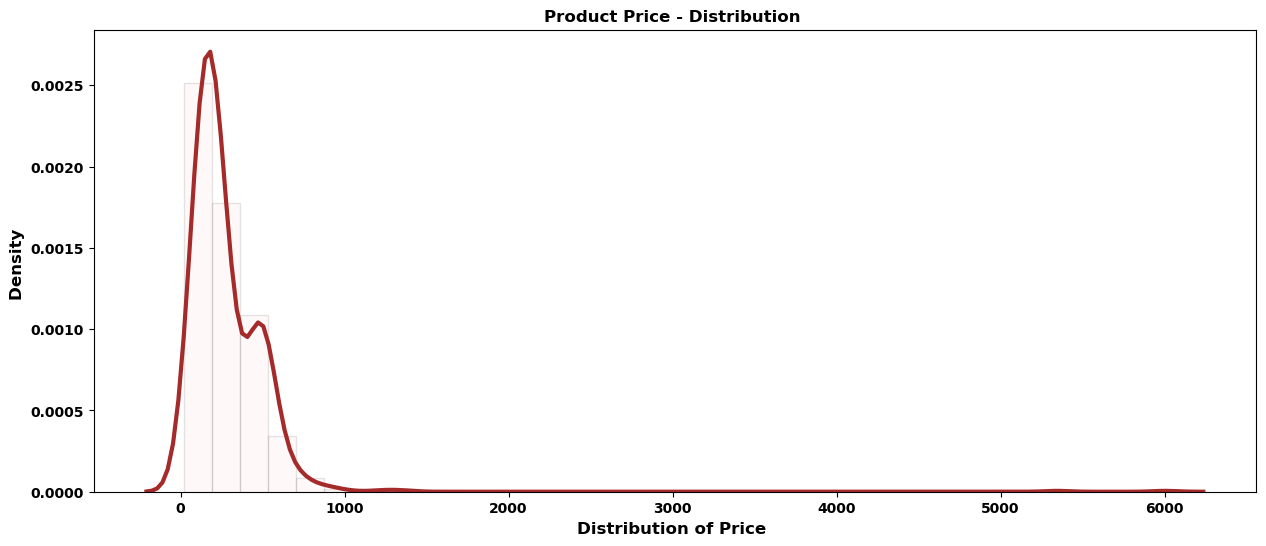

In [17]:
#Price Distribution:

plt.figure(figsize = (15,6))
plt.hist(df_shopsy['Price'],density = True,bins = 35,alpha = 0.1,color = 'pink',edgecolor = 'black')

sns.kdeplot(df_shopsy['Price'],color = 'Brown',lw = 3)   #density plot

plt.xlabel('Distribution of Price ',fontsize = 12,fontweight = 'bold')
plt.ylabel('Density ',fontsize = 12,fontweight = 'bold')
plt.title('Product Price - Distribution ',fontsize = 12,fontweight = 'bold')
plt.xticks(fontweight = 'bold',color='black')
plt.yticks(fontweight = 'bold',color='black')

plt.show()

## Insights:

- Price distribution is right-skewed.
- Majority of products fall in the low to mid-price range.
- Few high-price outliers exist.

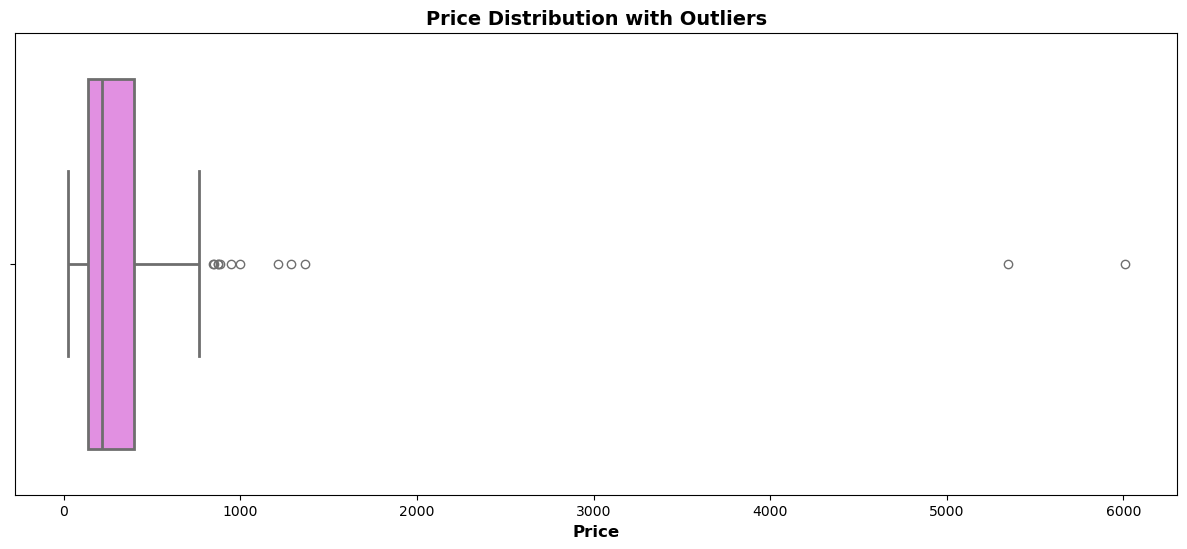

In [18]:
#Price Outliers Analysis:

plt.figure(figsize=(15, 6))

sns.boxplot(
    x=df_shopsy['Price'],
    color='Violet',          
    linewidth=2,
    fliersize=6            
)

plt.title("Price Distribution with Outliers", fontsize=14, fontweight = 'bold')
plt.xlabel("Price", fontsize=12, fontweight = 'bold')

plt.show()

## Insights:

- Significant outliers exist above the upper whisker.
- These may represent premium or luxury products.
- Outliers increase variance and affect average price calculations.

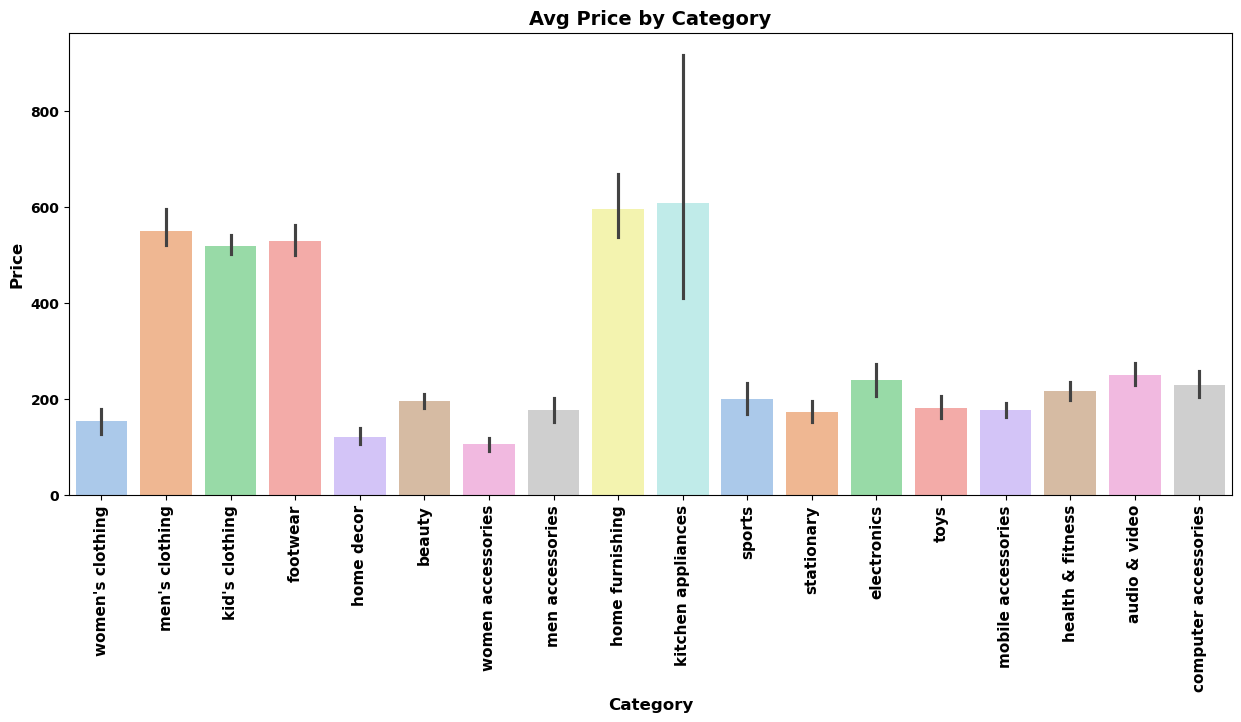

In [19]:
#Average Price by Category

plt.figure(figsize=(15,6))

sns.barplot(
    data=df_shopsy,
    x='Category',
    y='Price',
    palette = 'pastel'
)

plt.title('Avg Price by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Price', fontsize=12, fontweight='bold')

plt.xticks(rotation=90, fontsize=11, fontweight='bold', color='black')
plt.yticks(fontweight='bold', color='black')
plt.show()

## Insights:

- Categories like kitchen appliances, home furnishing, and clothing have higher average prices.
- Accessories, stationery, and beauty categories are relatively low-priced.
- Large price variation exists within certain categories.

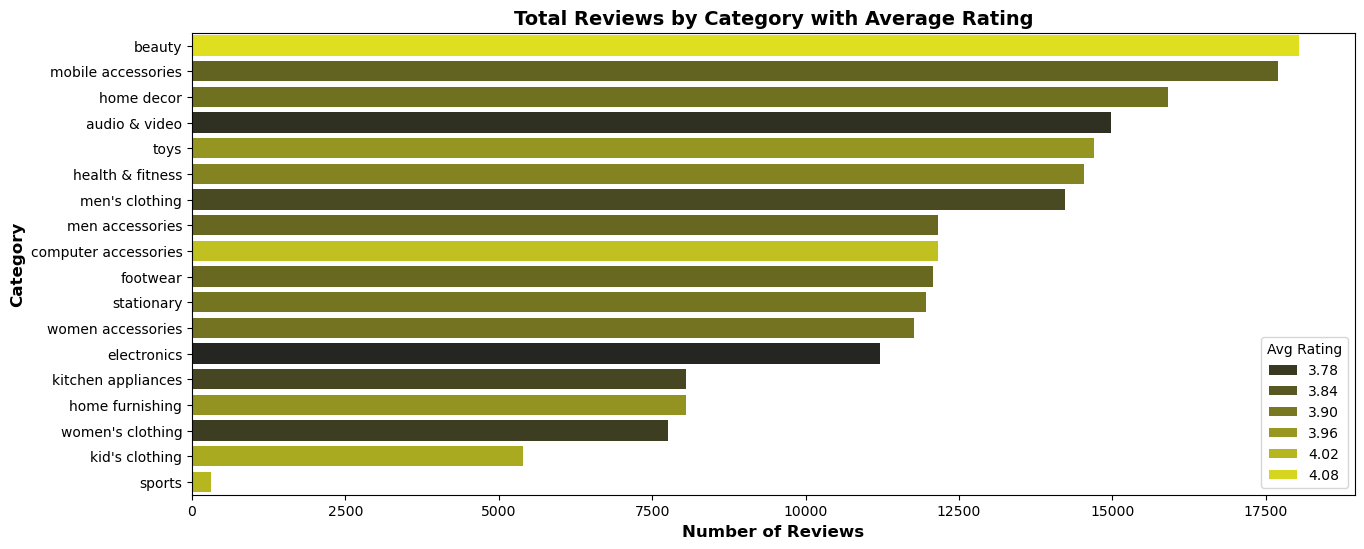

In [20]:
#Total review by Category with Average Rating:

# Prepare data
plot_data = df_shopsy.groupby('Category').agg({
    'No_of_Reviews': 'sum',
    'Rating': 'mean'
}).sort_values('No_of_Reviews', ascending = False)

plt.figure(figsize=(15,6))

sns.barplot(
    x='No_of_Reviews',
    y=plot_data.index,
    data=plot_data,
    color = 'Yellow',           
    hue=plot_data['Rating'],     
    dodge=False
)

plt.title("Total Reviews by Category with Average Rating", fontsize=14, fontweight='bold')
plt.xlabel("Number of Reviews",fontsize=12, fontweight='bold')
plt.ylabel("Category",fontsize=12, fontweight='bold')
plt.legend(title="Avg Rating")
plt.show()

## Insights:

- Categories like toys, beauty, mobile accessories, and women accessories have the highest review counts.
- High review count indicates high customer engagement and popularity.
- Average ratings across categories are mostly between 3.7 and 4.1, showing generally positive feedback.

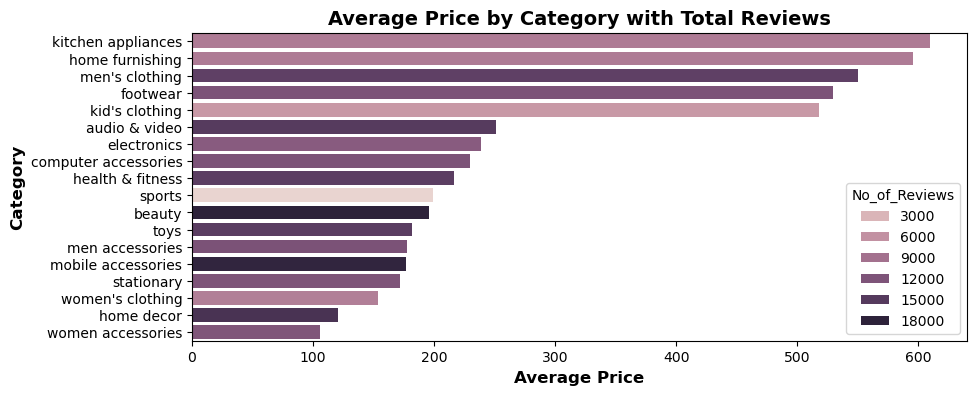

In [21]:
#Average price by Category with Total Reviews:

category_data = df_shopsy.groupby('Category').agg({'Price':'mean','No_of_Reviews':'sum'}).sort_values('Price', ascending = False)

plt.figure(figsize=(10,4))
sns.barplot(
    x='Price',
    y=category_data.index,
    data=category_data,
    hue=category_data['No_of_Reviews'], 
    dodge=False
)
plt.title("Average Price by Category with Total Reviews", fontsize=14, fontweight='bold')
plt.xlabel("Average Price", fontsize=12, fontweight='bold')
plt.ylabel("Category", fontsize=12, fontweight='bold')
plt.show()

## Insights:

- These categories have higher average prices and dark color intensity, indicating high total reviews.
- Customers are willing to spend more and actively review these products.

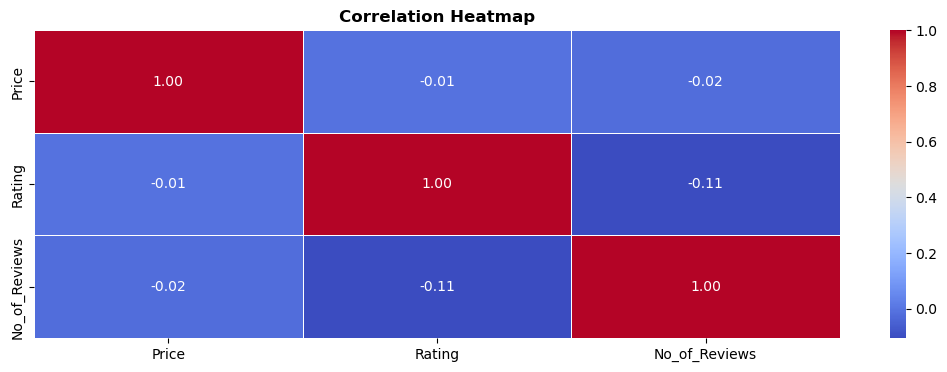

In [22]:
#Correlation Heatmap Analysis:

plt.figure(figsize=(13,4))
corr = df_shopsy.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap", fontweight='bold')
plt.show()

## Insights:

- Most features show weak or negative correlation.
- No strong linear relationships.
- Indicates complex, non-linear behavior.

## DATA STORAGE

In [23]:
df_shopsy.to_csv("df_cleaned_shopsy.csv", index=False)

df_cleaned_shopsy = pd.read_csv("df_cleaned_shopsy.csv")
df_cleaned_shopsy.head()

,Product Name,Category,Price,Rating,No_of_Reviews
0,Realglimpse Printed Women Pink T-Shirt,women's clothing,145,3.5,694
1,Full Sleeve Women Sweatshirt,women's clothing,192,3.8,562
2,Nakoda Creation Cotton Blend Women Dupatta,women's clothing,38,3.6,491
3,Monteiro Solid Women Multicolor Track Pants,women's clothing,122,3.7,136
4,"Molasus Women Hipster Blue, Yellow Panty",women's clothing,240,3.8,290


In [24]:
pip install sqlalchemy pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///shopsy_products.db')
df_cleaned_shopsy.to_sql('shopsy_products', engine, if_exists='replace', index=False)

978

In [32]:
df_check = pd.read_sql("SELECT * FROM shopsy_products LIMIT 5;", con=engine)
print(df_check)

                                  Product Name          Category  Price  \
0       Realglimpse Printed Women Pink T-Shirt  women's clothing    145   
1                 Full Sleeve Women Sweatshirt  women's clothing    192   
2   Nakoda Creation Cotton Blend Women Dupatta  women's clothing     38   
3  Monteiro Solid Women Multicolor Track Pants  women's clothing    122   
4     Molasus Women Hipster Blue, Yellow Panty  women's clothing    240   

   Rating  No_of_Reviews  
0     3.5            694  
1     3.8            562  
2     3.6            491  
3     3.7            136  
4     3.8            290  


In [33]:
query = "SELECT * FROM shopsy_products"
df = pd.read_sql(query,engine)

df.head()

,Product Name,Category,Price,Rating,No_of_Reviews
0,Realglimpse Printed Women Pink T-Shirt,women's clothing,145,3.5,694
1,Full Sleeve Women Sweatshirt,women's clothing,192,3.8,562
2,Nakoda Creation Cotton Blend Women Dupatta,women's clothing,38,3.6,491
3,Monteiro Solid Women Multicolor Track Pants,women's clothing,122,3.7,136
4,"Molasus Women Hipster Blue, Yellow Panty",women's clothing,240,3.8,290


In [34]:
df['Category'].unique()

array(["women's clothing", "men's clothing", "kid's clothing", 'footwear',
       'home decor', 'beauty', 'women accessories', 'men accessories',
       'home furnishing', 'kitchen appliances', 'sports', 'stationary',
       'electronics', 'toys', 'mobile accessories', 'health & fitness',
       'audio & video', 'computer accessories'], dtype=object)

## UNSUPERVISED LEARNING

## K-Means Clustering

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [36]:
# Feature Selection
X = df[['Price', 'Rating', 'No_of_Reviews']]

#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

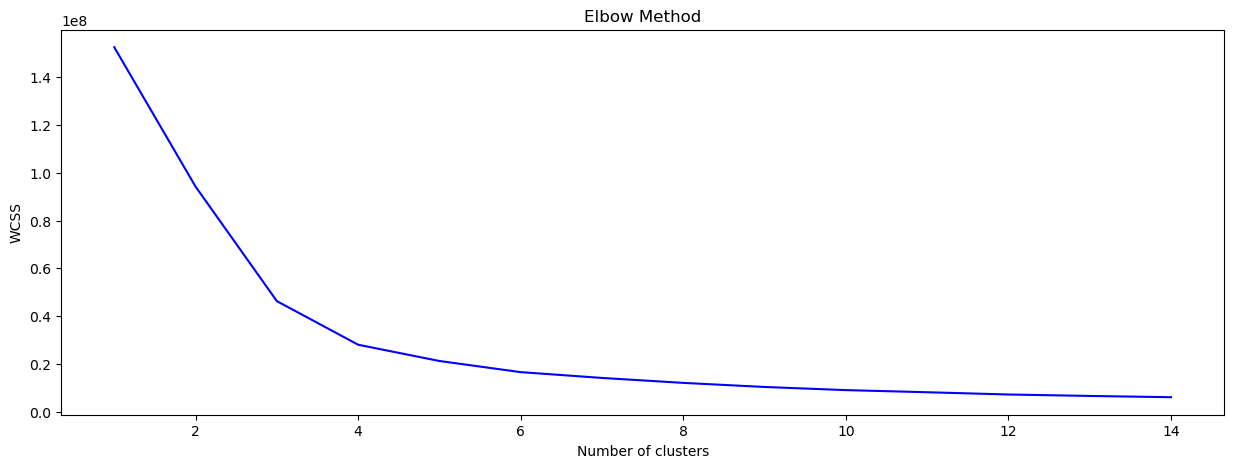

In [37]:
# Elbow method

wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(15,5))
plt.plot(range(1, 15), wcss,color='Blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
#Implement with k = 3 Clusters

kmeans = KMeans(n_clusters=3, 
                init='k-means++', 
                max_iter=300, 
                n_init=10, 
                random_state=0)

pred_y = kmeans.fit_predict(X_scaled)
pred_y

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,

In [40]:
df['Cluster'] = pred_y
df['Cluster'] = df['Cluster'] + 1 

In [41]:
df.head()

,Product Name,Category,Price,Rating,No_of_Reviews,Cluster
0,Realglimpse Printed Women Pink T-Shirt,women's clothing,145,3.5,694,2
1,Full Sleeve Women Sweatshirt,women's clothing,192,3.8,562,2
2,Nakoda Creation Cotton Blend Women Dupatta,women's clothing,38,3.6,491,2
3,Monteiro Solid Women Multicolor Track Pants,women's clothing,122,3.7,136,1
4,"Molasus Women Hipster Blue, Yellow Panty",women's clothing,240,3.8,290,1


In [42]:
df.groupby('Cluster')[['Price', 'Rating', 'No_of_Reviews']].mean()

,Price,Rating,No_of_Reviews
Cluster,,,
1,270.010610,3.919629,96.006631
2,267.265766,3.848198,623.247748
3,5675.500000,3.750000,106.500000


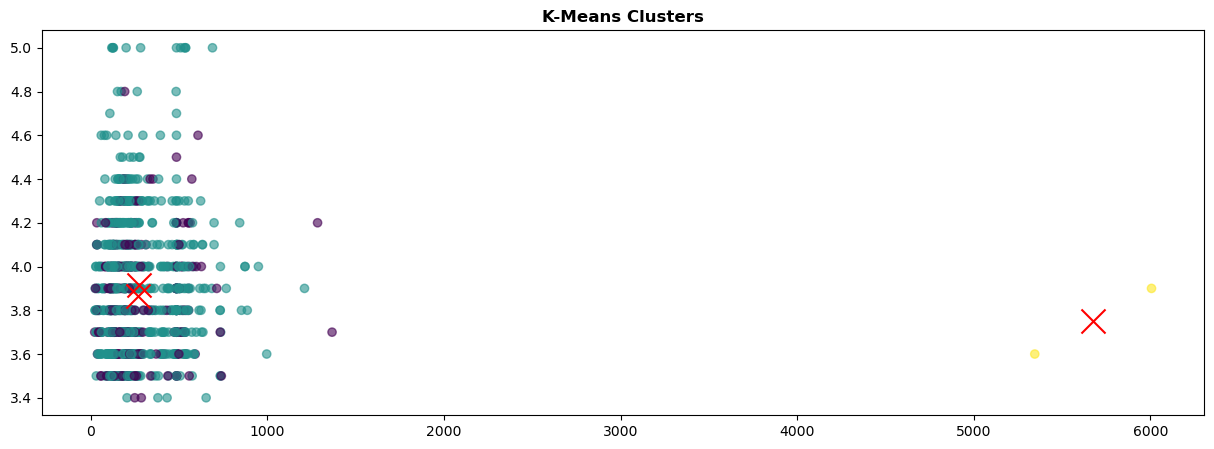

In [44]:
labels = kmeans.fit_predict(X)

plt.figure(figsize=(15,5))
plt.scatter(X.values[:, 0], X.values[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c='red',
    marker = 'x'
)

plt.title("K-Means Clusters",fontweight = 'bold')
plt.show()

In [45]:
# Save to MySQL
df.to_sql(
    name='croma_products_clustered',
    con=engine,
    if_exists='replace',
    index=False
)

978

## SUPERVISED LEARNING

In [48]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
    --------------------------------------- 1.6/72.0 MB 4.4 MB/s eta 0:00:17
   - -------------------------------------- 2.4/72.0 MB 4.8 MB/s eta 0:00:15
   - -------------------------------------- 3.1/72.0 MB 4.5 MB/s eta 0:00:16
   -- ------------------------------------- 4.2/72.0 MB 4.3 MB/s eta 0:00:16
   --- ------------------------------------ 5.8/72.0 MB 4.9 MB/s eta 0:00:14
   --- ------------------------------------ 6.6/72.0 MB 4.9 MB/s eta 0:00:14
   ---- ----------------------------------- 7.6/72.0 MB 4.8 MB/s eta 0:00:14
   ----- ---------------------------------- 9.2/72.0 MB 5.1 MB/s eta 0:00:13
   ----- ---------------------------------- 10.5/72.0 MB 5.3 MB/s eta 0:00:12
   ------ --------

In [49]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [50]:
X = df[['Product Name', 'Price', 'Rating', 'No_of_Reviews']]
y = df['Category']

In [51]:
le = LabelEncoder()
y = le.fit_transform(y)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            stop_words='english'
        ), 'Product Name'),

        ('num', StandardScaler(), ['Price', 'Rating', 'No_of_Reviews'])
    ]
)


In [54]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(
        objective='multi:softmax',
        num_class=len(set(y)),
        eval_metric='mlogloss',
        random_state=42
    )
}


In [55]:
results = []

for name, model in models.items():
    pipeline = ImbPipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.923469   0.928149  0.923469  0.923299
1                  SVM  0.780612   0.805158  0.780612  0.781560
2        Decision Tree  0.836735   0.873652  0.836735  0.842033
3        Random Forest  0.928571   0.935250  0.928571  0.927399
4              XGBoost  0.862245   0.866035  0.862245  0.859432


## Insights:

**Random Forest gives 92% ,Logistic Regression gives 92% and XGBoost gives 86%  were selected for hyperparameter tuning due to their superior performance and potential for further accuracy improvement.**

## HYPERPARAMETER TUNING

In [59]:
# Features & Target
X = df[['Product Name', 'Price', 'Rating', 'No_of_Reviews']]
y = df['Category']

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split (ONLY ONCE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            stop_words='english'
        ), 'Product Name'),
        ('num', StandardScaler(), ['Price', 'Rating', 'No_of_Reviews'])
    ]
)


## RANDOM FOREST

In [58]:

rf_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(
        random_state=42,
        class_weight='balanced'
    ))
])


rf_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}


rf_grid = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

print("\nRANDOM FOREST (BALANCED + TUNED)")
print("Best Params:", rf_grid.best_params_)
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_rf, average='weighted'))



RANDOM FOREST (BALANCED + TUNED)
Best Params: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Accuracy : 0.9285714285714286
Precision: 0.9352497916162511
Recall   : 0.9285714285714286
F1 Score : 0.9273993859948243


## LOGISTIC REGRESSION

In [60]:

lr_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        n_jobs=-1
    ))
])

lr_param_grid = {
    'model__C': [0.01, 0.1, 1, 10]
}

lr_grid = GridSearchCV(
    lr_pipeline,
    lr_param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1
)

lr_grid.fit(X_train, y_train)

lr_best = lr_grid.best_estimator_
y_pred_lr = lr_best.predict(X_test)

print("\nLOGISTIC REGRESSION (BALANCED + TUNED)")
print("Best Params:", lr_grid.best_params_)
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_lr, average='weighted'))



LOGISTIC REGRESSION (BALANCED + TUNED)
Best Params: {'model__C': 10}
Accuracy : 0.9438775510204082
Precision: 0.9476819948758725
Recall   : 0.9438775510204082
F1 Score : 0.9439788435103954


## XGBOOSTING

In [61]:
import numpy as np
xgb_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        num_class=len(np.unique(y)),
        tree_method='hist',   
        random_state=42,
        n_jobs=-1
    ))
])


xgb_param_dist = {
    'model__n_estimators': [100, 150],
    'model__max_depth': [4, 6],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    xgb_pipeline,
    xgb_param_dist,
    n_iter=10,               
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42
)


xgb_random.fit(X_train, y_train)

xgb_best = xgb_random.best_estimator_

y_pred_xgb = xgb_best.predict(X_test)

print("\nXGBOOST FINAL RESULTS")
print("Best Params:", xgb_random.best_params_)
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_xgb, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_xgb, average='weighted'))


XGBOOST FINAL RESULTS
Best Params: {'model__subsample': 0.8, 'model__n_estimators': 100, 'model__max_depth': 4, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.8}
Accuracy : 0.8979591836734694
Precision: 0.9067447433518862
Recall   : 0.8979591836734694
F1 Score : 0.897865133589927
